In [26]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt

In [31]:
norms = []
nccs = []
def align(img, goal):
    """
    Returns img such that it is aligned according to goal
    """
    best_img = None
    best_metric = float("inf")
    search_range = 25
    for i in range(-search_range, search_range):
        for j in range(-search_range, search_range):
            shifted_img = np.roll(img, shift=(i, j), axis=(0, 1))
            metric = np.sqrt(np.sum(np.sum((shifted_img - goal)**2)))
            norms.append(metric)
            shifted_img_flat, goal_flat = shifted_img.flatten(), goal.flatten()
            metric2 = np.dot(shifted_img_flat/np.linalg.norm(shifted_img_flat), goal_flat/np.linalg.norm(goal_flat))
            nccs.append(metric2)
            metric = metric/metric2
            if metric < best_metric:
                best_metric = metric
                best_img = shifted_img
    return best_img

def align_pyramid(img, goal):
    """
    Performs a image pyramid style alignment search.
    At increasing scales, uses align(), feeds the results of the previous align into the next
    """

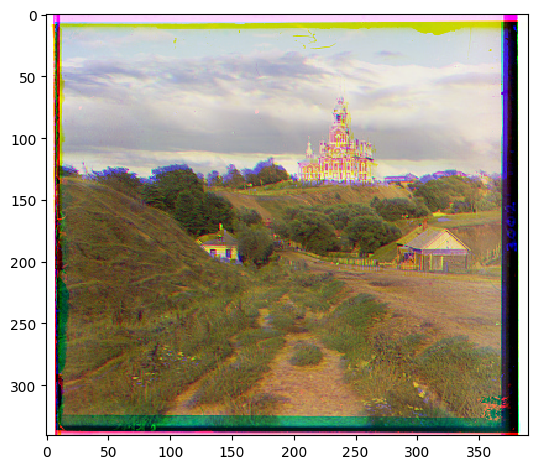

In [32]:
# name of the input file
imname = 'data/cathedral.jpg'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

ag = align(g, b)
ar = align(r, b)
# create a color image
im_out = np.dstack([ar, ag, b])

# save the image
fname = 'results/out_fname.jpg'
#skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()

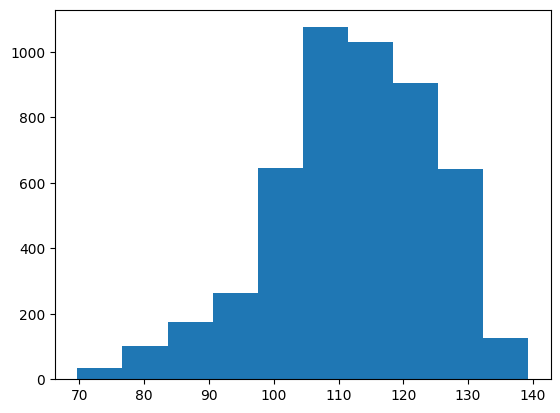

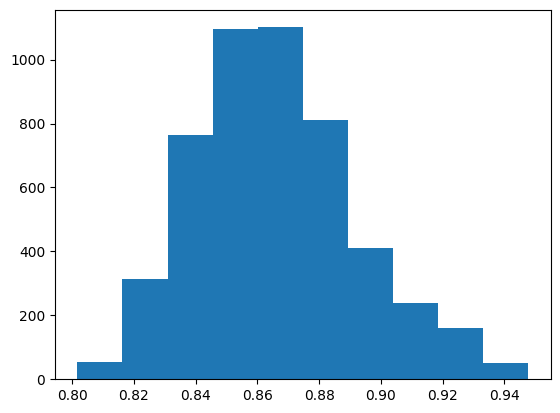

In [28]:
norms, nccs = np.array(norms), np.array(nccs)
plt.hist(norms)
plt.show()
plt.hist(nccs)
plt.show()

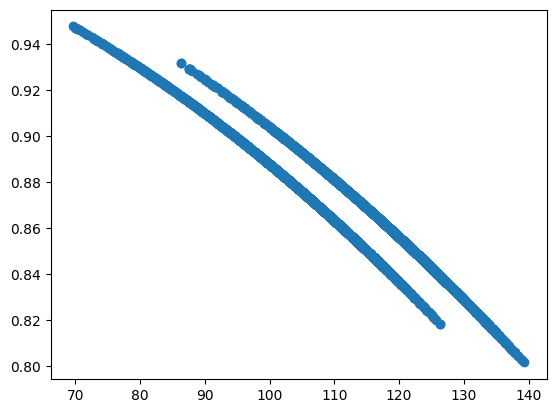

In [ ]:
plt.scatter(norms, nccs)
plt.show()
# looks like the two curves are r and g, and they're monotonically related.

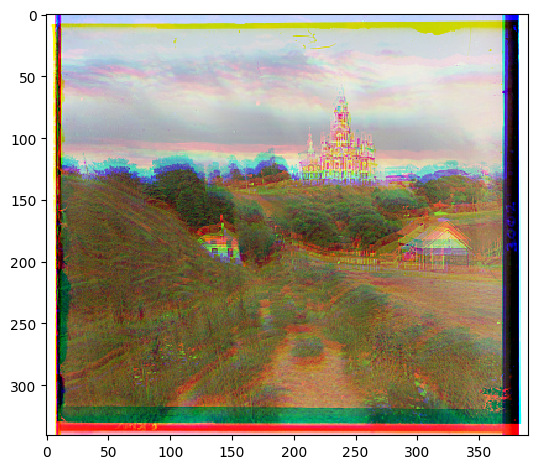

In [14]:
im_out = np.dstack([r, g, b])

# save the image
fname = 'results/out_fname.jpg'
#skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()

In [19]:
b_flat, g_flat = b.flatten(), g.flatten()
np.dot(b_flat/np.linalg.norm(b_flat), g_flat/np.linalg.norm(g_flat))

0.9465291629419613

In [34]:
b_flat, ag_flat = b.flatten(), ag.flatten()
np.dot(b_flat/np.linalg.norm(b_flat), ag_flat/np.linalg.norm(ag_flat))

0.9477895420600555

In [30]:
np.sqrt(np.sum(np.sum((b - g)**2)))

70.44953410105525

In [33]:
np.sqrt(np.sum(np.sum((b - ag)**2)))

69.67737615183887